In [5]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import random 

plt.style.use(['science', 'retro', 'grid'])

import sys
import cvxopt as opt
sys.path.insert(0, os.path.abspath('../../src/rl/gaussian/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/base'))
sys.path.insert(2, os.path.abspath('../../src/mpt/efficient_frontier/'))
sys.path.insert(3, os.path.abspath('../../src/mpt/utils'))

In [6]:
import importlib
importlib.reload(sys.modules['EfficientFrontier'])
importlib.reload(sys.modules['GenerativeMarketEnv'])
importlib.reload(sys.modules['Harness'])
importlib.reload(sys.modules['ParallelRunner'])
importlib.reload(sys.modules['GaussianPolicy'])

<module 'GaussianPolicy' from '/Users/michael/UCL/Disertation/porfolio-optimisation/src/rl/gaussian/GaussianPolicy.py'>

In [7]:
from GenerativeMarketEnv import GenerativeMarketEnv
from GaussianPolicy import GaussianPolicy
from Harness import Harness
from ParallelRunner import ParallelRunner
from EfficientFrontier import EfficientFrontier
from MarketFactory import MarketFactory

In [8]:
stocks = ['AAPL' ,'ADBE' ,'ADI' ,'ADP' ,'ADSK' ,'AEP' ,'ALGN' ,'ALXN' ,'AMAT' ,'AMD' ,'AMGN' ,'AMZN' ,'ANSS' ,'ASML' ,'ATVI'
 ,'AVGO' ,'BIDU' ,'BIIB' ,'BKNG' ,'CDNS' ,'CDW' ,'CERN' ,'CHKP' ,'CHTR' ,'CMCSA' ,'COST' ,'CPRT' ,'CSCO' ,'CSX' ,'CTAS'
 ,'CTSH' ,'DLTR' ,'DOCU' ,'DXCM' ,'EA' ,'EBAY' ,'EXC' ,'FAST' ,'FB' ,'FISV' ,'FOX' ,'FOXA' ,'GILD' ,'GOOG' ,'GOOGL'
 ,'IDXX' ,'ILMN' ,'INCY' ,'INTC' ,'INTU' ,'ISRG' ,'JD' ,'KDP' ,'KHC' ,'KLAC' ,'LRCX' ,'LULU' ,'MAR' ,'MCHP' ,'MDLZ'
 ,'MELI' ,'MNST' ,'MRNA' ,'MRVL' ,'MSFT' ,'MTCH' ,'MU' ,'MXIM' ,'NFLX' ,'NTES' ,'NVDA' ,'NXPI' ,'OKTA' ,'ORLY' ,'PAYX'
 ,'PCAR' ,'PDD' ,'PEP' ,'PTON' ,'PYPL' ,'QCOM' ,'REGN' ,'ROST' ,'SBUX' ,'SGEN' ,'SIRI' ,'SNPS' ,'SPLK' ,'SWKS' ,'TCOM'
 ,'TEAM' ,'TMUS' ,'TSLA' ,'TXN' ,'VRSK' ,'VRSN' ,'VRTX' ,'WBA' ,'WDAY' ,'XEL' ,'XLNX' ,'ZM']

In [16]:
random.shuffle(stocks)
# sampled_stocks_10 = stocks[:10]
sampled_stocks_10 = ['MNST', 'JD', 'CDNS', 'CMCSA', 'FAST', 'LRCX', 'ALGN', 'VRSN', 'GOOG', 'ALXN']

[*********************100%***********************]  10 of 10 completed


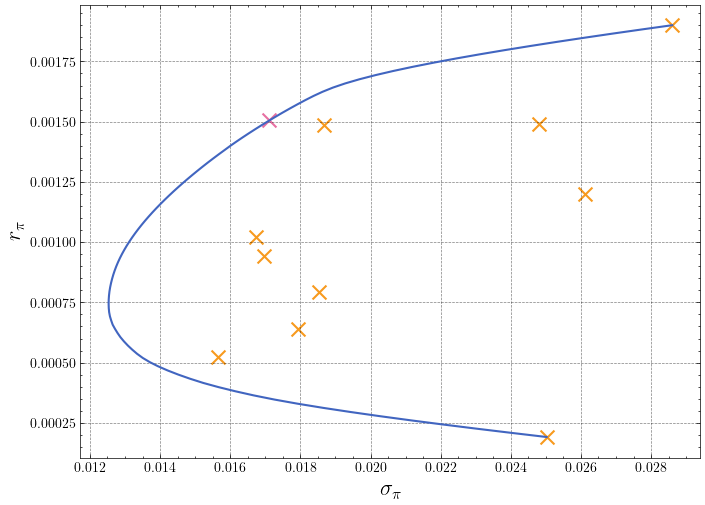

0.08794216599084484

In [17]:
factory = MarketFactory(sampled_stocks_10, "2015-01-01", "2021-01-01")
market = factory.create_market()
market.plot_efficient_frontier()

In [24]:
params = {
    'n_assets': len(sampled_stocks_10),
    'α_μ': 1,
    'α_σ': 1e-10,
    'γ': 0.1,
    'eps': 2000
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3402.81it/s]
1it [00:10, 10.72s/it]


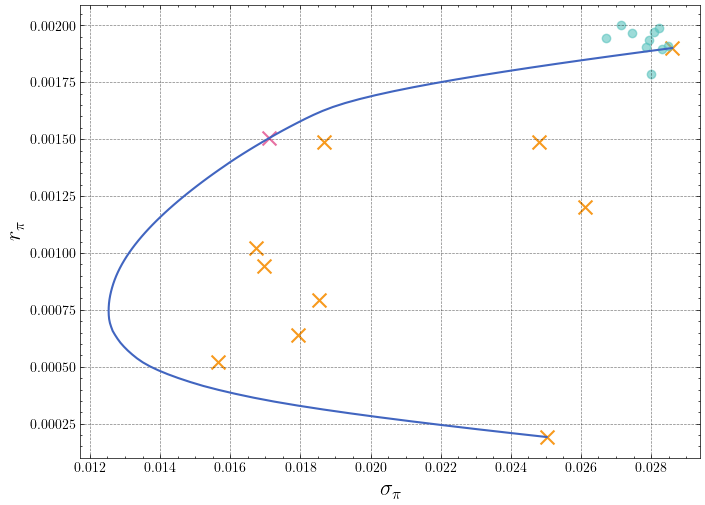

<Figure size 252x189 with 0 Axes>

In [25]:
market.plot_efficient_frontier(stds = stds, returns = means)
plt.savefig('./')

## 15 Stocks 

[*********************100%***********************]  15 of 15 completed


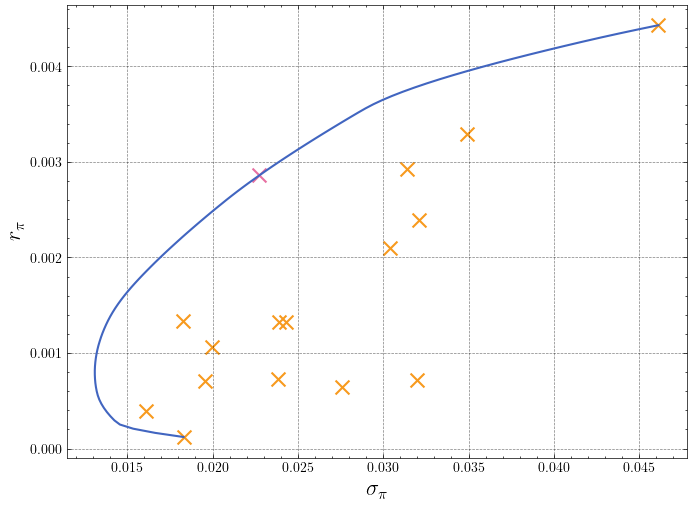

0.12571993399437173

In [35]:
random.shuffle(stocks)
sampled_stocks_15 = stocks[:15]
factory = MarketFactory(sampled_stocks_15, "2019-04-30", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [36]:
params = {
    'n_assets': len(sampled_stocks_15),
    'α_μ': 1,
    'α_σ': 1e-10,
    'γ': 0.1,
    'eps': 2000
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 74.94it/s]
1it [00:12, 12.35s/it]


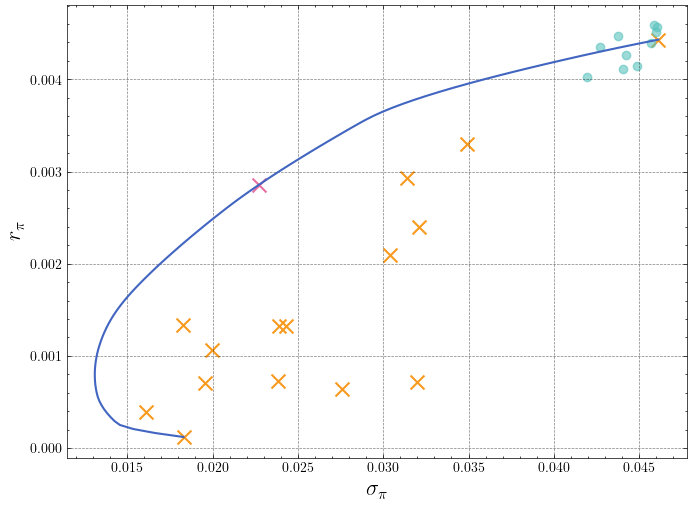

0.12571993399437173

In [37]:
market.plot_efficient_frontier(stds = stds, returns = means)

## 25 Stocks

[*********************100%***********************]  25 of 25 completed


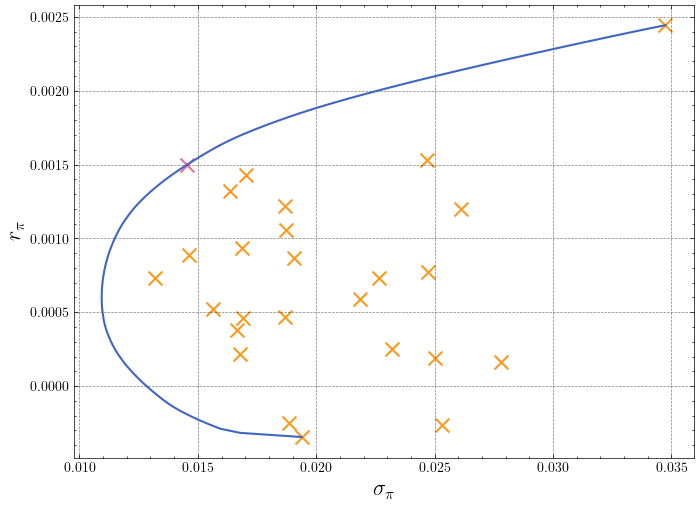

0.10308343623475925

In [30]:
random.shuffle(stocks)
sampled_stocks = ['KHC', 'MXIM', 'QCOM', 'AMGN', 'JD', 'FOXA', 'SNPS', 'BIIB', 'EXC', 'CPRT', 'AAPL', 'COST', 'CDW',
                  'GOOGL', 'BIDU', 'ALXN', 'WBA', 'CTSH','LULU', 'CMCSA', 'TSLA', 'ILMN', 'CSCO', 'MAR', 'VRSK']
factory = MarketFactory(sampled_stocks, "2015-01-01", "2021-01-01")
market = factory.create_market()
market.plot_efficient_frontier()

In [31]:
params = {
    'n_assets': len(sampled_stocks),
    'α_μ': 1,
    'α_σ': 1e-10,
    'γ': 0.1,
    'eps': 2000
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 69.25it/s]
1it [00:14, 14.93s/it]


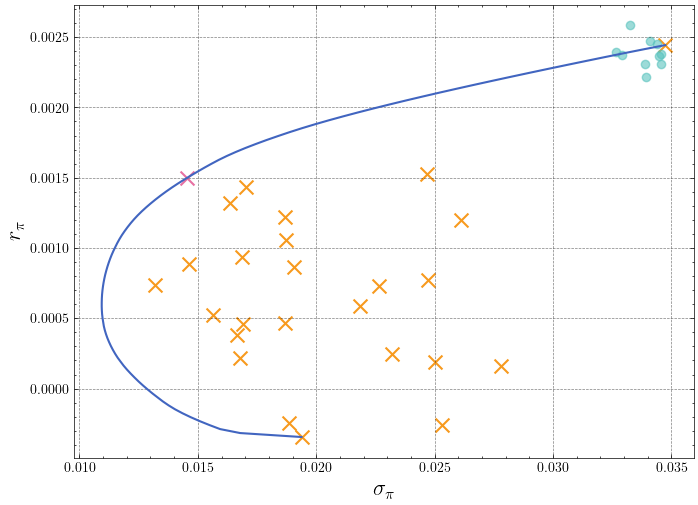

0.10308343623475925

In [33]:
market.plot_efficient_frontier(stds = stds, returns = means, save_name='gaus_25')

## 50 Stocks

[*********************100%***********************]  50 of 50 completed


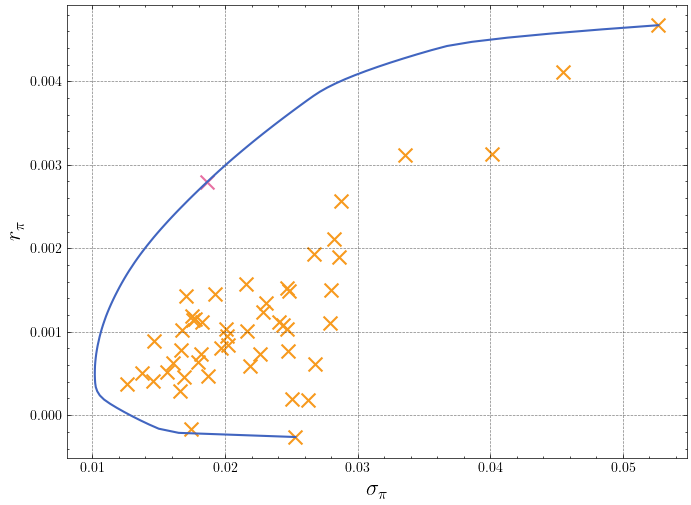

0.1498466263395621

In [44]:
random.shuffle(stocks)
sampled_stocks = sampled_stocks_50 = ['SBUX','PCAR','WDAY','ORLY','ILMN','CTAS','MDLZ','FAST','MRVL','NFLX','AMD','FB','MRNA',
                                      'QCOM','GILD','ROST','AVGO','ADSK','INTU','IDXX','XEL','AMAT','MSFT','ADP','XLNX','LRCX',
                                      'PDD','DOCU','TCOM','EA','LULU','VRSK','SGEN','ALXN','ANSS','CTSH','PYPL','CSCO','CMCSA',
                                      'PEP','CSX','FOXA','MELI','ALGN','NVDA','VRSN','SPLK','KDP','CPRT','MAR']
factory = MarketFactory(sampled_stocks, "2015-01-01", "2021-01-01")
market = factory.create_market()
market.plot_efficient_frontier()

In [60]:
params = {
    'n_assets': len(sampled_stocks),
    'α_μ': 2.2,
    'α_σ': 1e-10,
    'γ': 0.1,
    'eps': 1000
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 2997.64it/s]
1it [00:21, 21.35s/it]


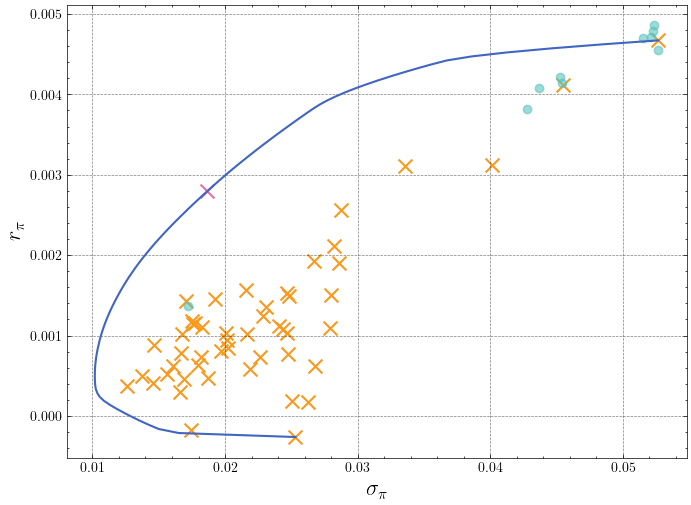

0.1498466263395621

In [61]:
market.plot_efficient_frontier(stds = stds, returns = means, save_name='gaus_50')

## 100 Stocks

[*********************100%***********************]  100 of 100 completed


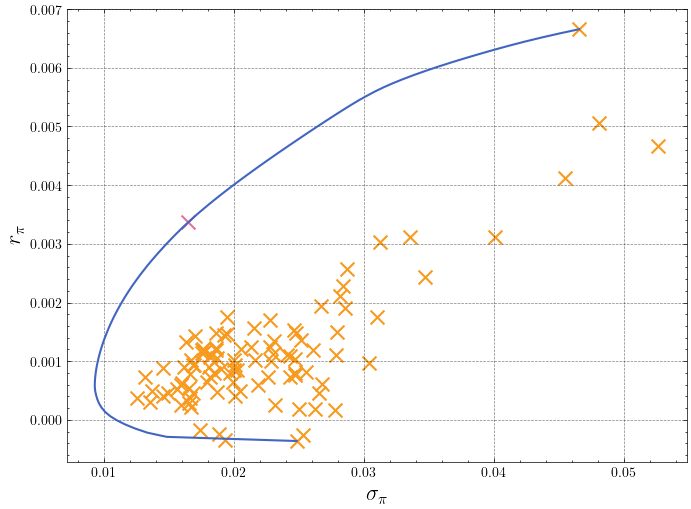

0.20397540768498826

In [36]:
random.shuffle(stocks)
sampled_stocks = ['XEL','ANSS','AMD','AMAT','DLTR','KDP','KHC','MCHP','INTC','MDLZ','EA','NVDA','IDXX','NTES','PAYX','CHTR','CTSH',
                  'MTCH','FOXA','VRSN','FB','GOOG','MAR','TCOM','DOCU','SPLK','EXC','CERN','SIRI','ADP','LULU','AEP','CPRT','AVGO',
                  'AMZN','VRSK','ZM','ALGN','VRTX','KLAC','NXPI','CSCO','BIDU','SNPS','CDW','CDNS','MNST','TEAM','ASML','TSLA',
                  'CMCSA','LRCX','TMUS','XLNX','NFLX','PEP','ROST','PTON','ATVI','ILMN','SBUX','MELI','CSX','INCY','BIIB','MXIM',
                  'INTU','ORLY','MU','QCOM','COST','FAST','TXN','ADBE','JD','MRNA','AMGN','ADSK','ALXN','BKNG','DXCM','WDAY','PCAR',
                  'OKTA','CTAS','GOOGL','MSFT','FOX','PDD','AAPL','GILD','FISV','SGEN','CHKP','PYPL','ADI','SWKS','ISRG','WBA','MRVL']
factory = MarketFactory(sampled_stocks, "2015-01-01", "2021-01-01")
market = factory.create_market()
market.plot_efficient_frontier()

In [37]:
params = {
    'n_assets': len(sampled_stocks),
    'α_μ': 1,
    'α_σ': 1e-10,
    'γ': 0.1,
    'eps': 2000
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 46.89it/s]
1it [01:13, 73.03s/it]


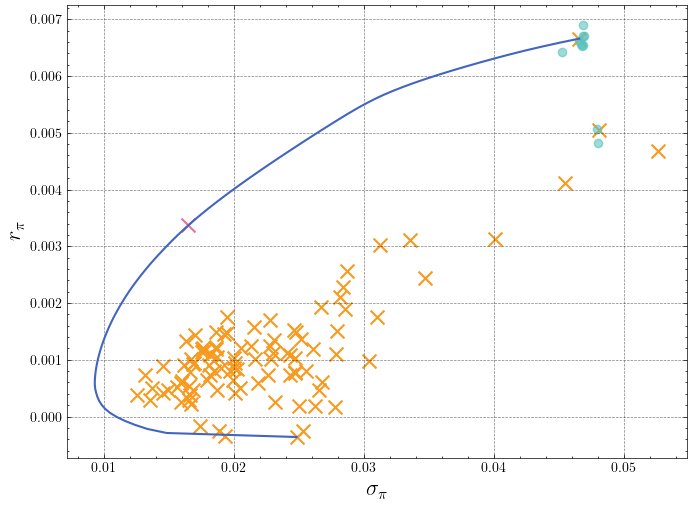

0.20397540768498823

In [43]:
market.plot_efficient_frontier(stds = stds, returns = means, save_name='gaus_100')

# DSR 

[*********************100%***********************]  10 of 10 completed


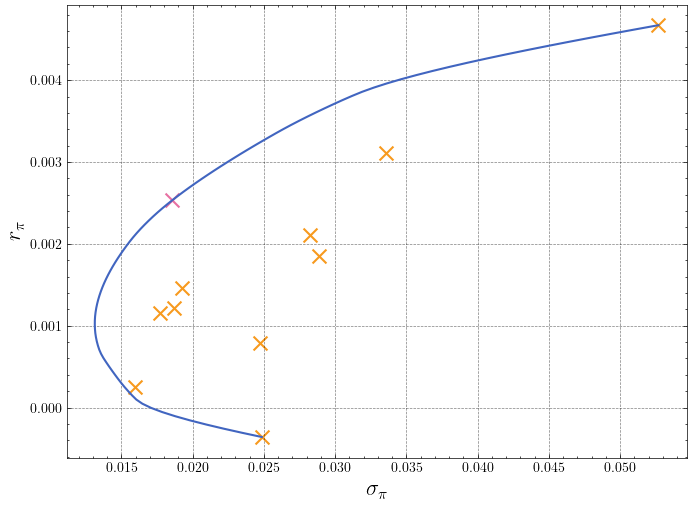

0.13642606497528936

In [9]:
random.shuffle(stocks)
sampled_stocks = ['MRNA', 'CTAS', 'CERN', 'IDXX', 'MELI', 'SWKS', 'AAPL', 'MTCH', 'DOCU', 'FOX']

factory = MarketFactory(sampled_stocks, "2015-01-01", "2021-01-01")
market = factory.create_market()
market.plot_efficient_frontier()

In [29]:
params = {
    'n_assets': len(sampled_stocks),
    'α_μ': 0.001,
    'α_σ': 1e-7,
    'γ': 0.1,
    'eps': 10000
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 100, reward_mode='dsr', η=0.05)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 4200.18it/s]
1it [01:39, 99.02s/it]


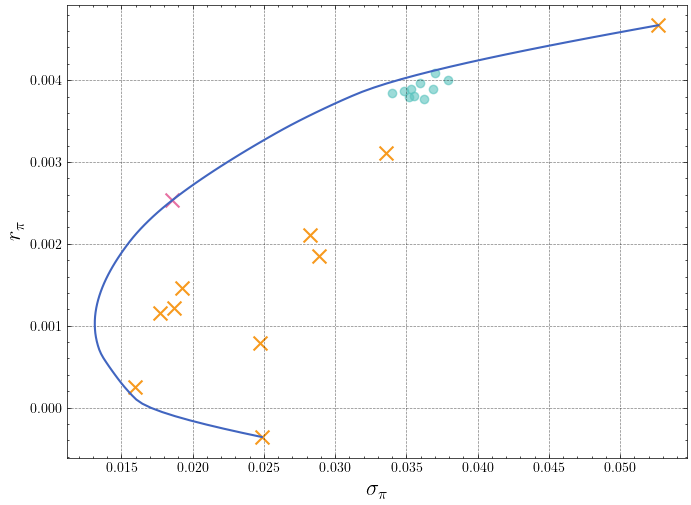

0.13642606497528936

In [31]:
market.plot_efficient_frontier(stds = stds, returns = means, save_name='dsr_gauss_10')

In [34]:
np.zeros(3) +1

array([1., 1., 1.])

In [44]:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [48]:
A[~np.eye(A.shape[0], dtype=bool)]

array([1, 2, 3, 5, 6, 7])